In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [26]:
result_df = pd.read_csv('VAE-CF.csv', sep='\t', encoding='utf-8')
result_df = result_df[241:]
result_df = result_df.reset_index(drop=True)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [27]:
result_df.columns

Index(['Clicks', 'MAP@1', 'MAP@10', 'MAP@5', 'MAP@50', 'NDCG', 'Precision@1',
       'Precision@10', 'Precision@5', 'Precision@50', 'R-Precision',
       'Recall@1', 'Recall@10', 'Recall@5', 'Recall@50',
       'active_learning_model', 'rec_model', 'rank', 'alpha', 'lambda', 'iter',
       'corruption', 'root', 'latent', 'active_learning_iteration',
       'iterative', 'sample_all'],
      dtype='object')

In [28]:
column = ['active_learning_model', 'rec_model', 'iterative', 'latent', 'sample_all', 'active_learning_iteration',
          'MAP@1', 'MAP@5', 'MAP@10', 'MAP@50', 'Precision@1', 'Precision@5', 'Precision@10', 'Precision@50', 
          'Recall@1', 'Recall@10', 'Recall@5', 'Recall@50', 'NDCG', 'R-Precision', 'Clicks', 
          'rank', 'alpha', 'lambda', 'iter', 'corruption', 'root']

In [29]:
# column = ['active_learning_model', 'rec_model', 'sampling', 'active_learning_iteration', 
#           'Clicks', 'MAP@1', 'Precision@1', 'Recall@1', 'NDCG', 'R-Precision', 'Num_Ones_In_Train', 
#           'Num_Ones_In_Prediction', 'total_num_active_learning_iteration', 
#           'Num_Ones_In_Test', 'Num_Zeros_In_Prediction', 
#           'rank', 'alpha', 'lambda', 'iter', 'corruption', 'root']

In [30]:
result_df = result_df[column]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [31]:
result_df.rename(columns={'active_learning_model':'Active Learning Model',
                          'rec_model':'Recommendation Model',
                          'iterative':'Iterative',
                          'latent':'Algorithm',
                          'sample_all':'Select',
                          'active_learning_iteration':'Active Learning Iteration'
                         }, 
                 inplace=True)

In [32]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [33]:
result_df.loc[result_df.Iterative == True, 'Iterative'] = 'Iter'
result_df.loc[result_df.Iterative == False, 'Iterative'] = 'NI'
result_df.loc[result_df.Algorithm == True, 'Algorithm'] = 'Th'
result_df.loc[result_df.Algorithm == False, 'Algorithm'] = 'Gr'
result_df.loc[result_df.Select == True, 'Select'] = 'All'
result_df.loc[result_df.Select == False, 'Select'] = 'Pos'

In [34]:
def extract_mean(metric_result):
    parentheses_index = metric_result.find('(')
    comma_index = metric_result.find(',')
    return np.float64(metric_result[parentheses_index+1: comma_index])

In [35]:
result_df['Clicks'] = result_df['Clicks'].apply(lambda x: extract_mean(x))
result_df['MAP@1'] = result_df['MAP@1'].apply(lambda x: extract_mean(x))
result_df['MAP@5'] = result_df['MAP@5'].apply(lambda x: extract_mean(x))
result_df['MAP@10'] = result_df['MAP@10'].apply(lambda x: extract_mean(x))
result_df['MAP@50'] = result_df['MAP@50'].apply(lambda x: extract_mean(x))
result_df['Precision@1'] = result_df['Precision@1'].apply(lambda x: extract_mean(x))
result_df['Precision@5'] = result_df['Precision@5'].apply(lambda x: extract_mean(x))
result_df['Precision@10'] = result_df['Precision@10'].apply(lambda x: extract_mean(x))
result_df['Precision@50'] = result_df['Precision@50'].apply(lambda x: extract_mean(x))
result_df['Recall@1'] = result_df['Recall@1'].apply(lambda x: extract_mean(x))
result_df['Recall@5'] = result_df['Recall@5'].apply(lambda x: extract_mean(x))
result_df['Recall@10'] = result_df['Recall@10'].apply(lambda x: extract_mean(x))
result_df['Recall@50'] = result_df['Recall@50'].apply(lambda x: extract_mean(x))
result_df['NDCG'] = result_df['NDCG'].apply(lambda x: extract_mean(x))
result_df['R-Precision'] = result_df['R-Precision'].apply(lambda x: extract_mean(x))

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(result_df)

,Active Learning Model,Recommendation Model,Iterative,Algorithm,Select,Active Learning Iteration,MAP@1,MAP@5,MAP@10,MAP@50,Precision@1,Precision@5,Precision@10,Precision@50,Recall@1,Recall@10,Recall@5,Recall@50,NDCG,R-Precision,Clicks,rank,alpha,lambda,iter,corruption,root
0,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.579528,0.552625,0.513678,0.355755,0.579528,0.513386,0.453071,0.240157,0.008448,0.064648,0.037001,0.170205,0.230114,0.168349,0.130866,50,1.0,0.0001,300,0.5,1
1,ThompsonSampling,VAE-CF,Iter,Th,Pos,50,0.685624,0.620105,0.579800,0.436857,0.685624,0.584252,0.514803,0.327244,0.010135,0.074767,0.042651,0.235397,0.298666,0.231311,0.073858,50,1.0,0.0001,300,0.5,1
2,ThompsonSampling,VAE-CF,Iter,Gr,All,50,0.594637,0.564997,0.521879,0.358876,0.594637,0.526299,0.452441,0.241228,0.008718,0.064365,0.037784,0.171468,0.232246,0.169286,0.110236,50,1.0,0.0001,300,0.5,1
3,ThompsonSampling,VAE-CF,NI,Th,All,50,0.572555,0.526136,0.480645,0.330640,0.572555,0.479370,0.407874,0.229386,0.008270,0.058111,0.034263,0.162337,0.217417,0.159760,0.136535,50,1.0,0.0001,300,0.5,1
4,ThompsonSampling,VAE-CF,Iter,Gr,Pos,50,0.674016,0.619753,0.580817,0.438752,0.674016,0.577638,0.525827,0.327370,0.009921,0.076913,0.042373,0.236019,0.299659,0.232561,0.076378,50,1.0,0.0001,300,0.5,1
5,ThompsonSampling,VAE-CF,NI,Th,Pos,50,0.619651,0.588520,0.559269,0.418310,0.619651,0.561890,0.505827,0.307654,0.009082,0.073603,0.041234,0.221533,0.282640,0.218401,0.097165,50,1.0,0.0001,300,0.5,1
6,ThompsonSampling,VAE-CF,NI,Gr,All,50,0.617323,0.561218,0.516268,0.348768,0.617323,0.520000,0.447874,0.229795,0.008998,0.063500,0.037369,0.162214,0.223784,0.160092,0.115748,50,1.0,0.0001,300,0.5,1
7,ThompsonSampling,VAE-CF,NI,Gr,Pos,50,0.681458,0.639507,0.600080,0.439368,0.681458,0.602520,0.538268,0.314772,0.009991,0.078286,0.044121,0.226491,0.293970,0.223149,0.061575,50,1.0,0.0001,300,0.5,1
8,ThompsonSampling,VAE-CF,Iter,Th,All,20,0.441288,0.375532,0.331579,0.215609,0.441288,0.325631,0.267487,0.146313,0.011838,0.067199,0.041317,0.183573,0.205847,0.141330,0.395581,50,1.0,0.0001,300,0.5,1
9,ThompsonSampling,VAE-CF,Iter,Th,Pos,20,0.547242,0.492311,0.445988,0.289762,0.547242,0.444192,0.373611,0.188535,0.015311,0.101096,0.060718,0.247531,0.279614,0.194433,0.168119,50,1.0,0.0001,300,0.5,1


In [37]:
result_df_table = result_df.copy(deep=True)
result_df_table['Iter Alg Sel'] = list(zip(result_df.Iterative, result_df.Algorithm, result_df.Select))
result_df_table[result_df_table['Active Learning Iteration'] == 50]

result_df_table = result_df_table.groupby('Iter Alg Sel', as_index=False).\
agg({'MAP@1':'mean','MAP@5':'mean', 'MAP@10':'mean','MAP@50':'mean',
    'Precision@1':'mean', 'Precision@5':'mean', 'Precision@10':'mean', 'Precision@50':'mean',
    'Recall@1':'mean', 'Recall@5':'mean', 'Recall@10':'mean', 'Recall@50':'mean',
    'NDCG':'mean', 'R-Precision':'mean', 'Clicks':'mean'}).\
reindex([0, 2, 4, 6, 1, 3, 5, 7]).reset_index(drop=True)
# .to_csv("table.csv", sep='\t', encoding='utf-8', index=False)
result_df_table

,Iter Alg Sel,MAP@1,MAP@5,MAP@10,MAP@50,Precision@1,Precision@5,Precision@10,Precision@50,Recall@1,Recall@5,Recall@10,Recall@50,NDCG,R-Precision,Clicks
0,"(Iter, Gr, All)",0.603963,0.563242,0.521552,0.360440,0.603963,0.525945,0.453539,0.244937,0.008885,0.037856,0.064528,0.172489,0.232665,0.168602,0.120251
1,"(Iter, Th, All)",0.598570,0.557457,0.516493,0.358145,0.598570,0.518463,0.450838,0.243385,0.008826,0.037199,0.063971,0.171157,0.230858,0.167219,0.127550
2,"(NI, Gr, All)",0.609861,0.557385,0.513485,0.349358,0.609861,0.513570,0.444566,0.233180,0.008939,0.036927,0.063120,0.163675,0.223808,0.159777,0.126499
3,"(NI, Th, All)",0.570923,0.515742,0.474172,0.330302,0.570923,0.471866,0.409861,0.231296,0.008302,0.033757,0.058015,0.162898,0.216383,0.158793,0.153931
4,"(Iter, Gr, Pos)",0.662048,0.617729,0.579140,0.437065,0.662048,0.578738,0.519607,0.326987,0.009905,0.042709,0.076039,0.234640,0.297423,0.229102,0.079179
5,"(Iter, Th, Pos)",0.662363,0.617602,0.579941,0.437728,0.662363,0.579819,0.520601,0.327468,0.009920,0.042762,0.076108,0.234885,0.297706,0.229141,0.077651
6,"(NI, Gr, Pos)",0.667827,0.628801,0.592231,0.436822,0.667827,0.594031,0.532594,0.315085,0.009948,0.043764,0.077900,0.225497,0.291535,0.220324,0.074027
7,"(NI, Th, Pos)",0.654356,0.609363,0.570833,0.420803,0.654356,0.571543,0.509240,0.308106,0.009776,0.042316,0.074670,0.221391,0.284139,0.216080,0.082829


In [38]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)

    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

result_df_table[:4].style.apply(highlight_max)

,Iter Alg Sel,MAP@1,MAP@5,MAP@10,MAP@50,Precision@1,Precision@5,Precision@10,Precision@50,Recall@1,Recall@5,Recall@10,Recall@50,NDCG,R-Precision,Clicks
0,"('Iter', 'Gr', 'All')",0.603963,0.563242,0.521552,0.36044,0.603963,0.525945,0.453539,0.244937,0.00888458,0.0378565,0.0645285,0.172489,0.232665,0.168602,0.120251
1,"('Iter', 'Th', 'All')",0.59857,0.557457,0.516493,0.358145,0.59857,0.518463,0.450838,0.243385,0.00882575,0.0371987,0.0639712,0.171157,0.230858,0.167219,0.12755
2,"('NI', 'Gr', 'All')",0.609861,0.557385,0.513485,0.349358,0.609861,0.51357,0.444566,0.23318,0.00893929,0.0369271,0.0631205,0.163675,0.223808,0.159777,0.126499
3,"('NI', 'Th', 'All')",0.570923,0.515742,0.474172,0.330302,0.570923,0.471866,0.409861,0.231296,0.00830227,0.0337565,0.058015,0.162898,0.216383,0.158793,0.153931


In [39]:
result_df_table[4:].style.apply(highlight_max)

,Iter Alg Sel,MAP@1,MAP@5,MAP@10,MAP@50,Precision@1,Precision@5,Precision@10,Precision@50,Recall@1,Recall@5,Recall@10,Recall@50,NDCG,R-Precision,Clicks
4,"('Iter', 'Gr', 'Pos')",0.662048,0.617729,0.57914,0.437065,0.662048,0.578738,0.519607,0.326987,0.00990483,0.0427095,0.0760388,0.23464,0.297423,0.229102,0.0791788
5,"('Iter', 'Th', 'Pos')",0.662363,0.617602,0.579941,0.437728,0.662363,0.579819,0.520601,0.327468,0.00992032,0.0427625,0.076108,0.234885,0.297706,0.229141,0.0776513
6,"('NI', 'Gr', 'Pos')",0.667827,0.628801,0.592231,0.436822,0.667827,0.594031,0.532594,0.315085,0.00994806,0.0437644,0.0779,0.225497,0.291535,0.220324,0.074027
7,"('NI', 'Th', 'Pos')",0.654356,0.609363,0.570833,0.420803,0.654356,0.571543,0.50924,0.308106,0.00977573,0.0423163,0.0746695,0.221391,0.284139,0.21608,0.0828292


In [40]:
# result_df_Iter_Th_All = result_df[(result_df['Iterative'] == 'Iter') &
#                                   (result_df['Algorithm'] == 'Th') &
#                                   (result_df['Select'] == 'All')]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df_Iter_Th_All)

In [41]:
sns.set_style("ticks")

In [42]:
result_df['Model'] = list(zip(result_df.Iterative, result_df.Algorithm, result_df.Select, result_df['Active Learning Iteration']))

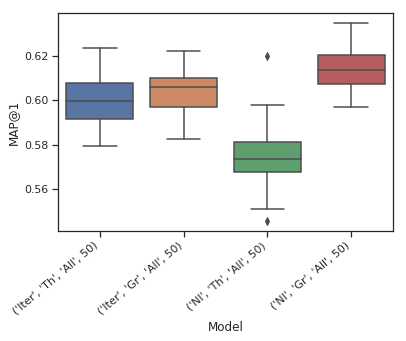

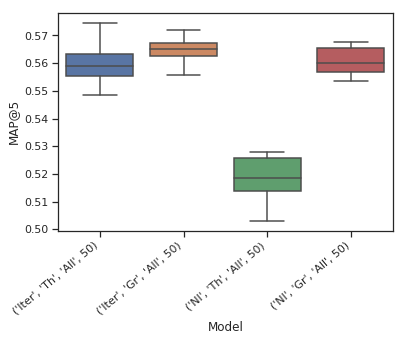

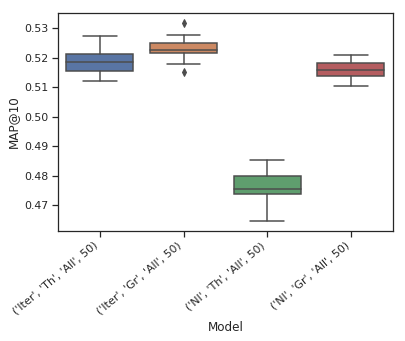

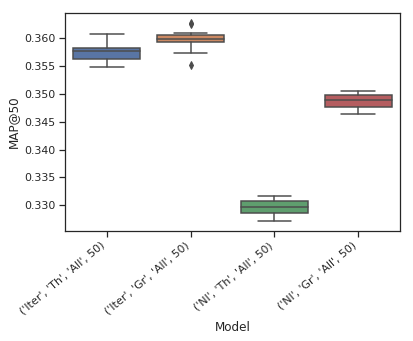

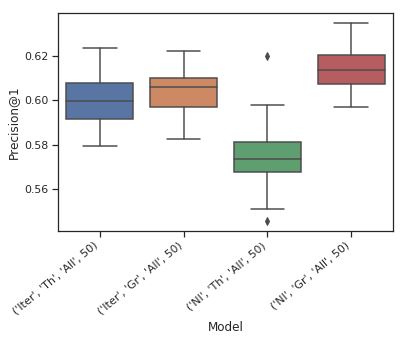

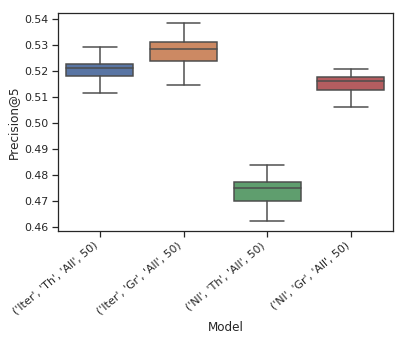

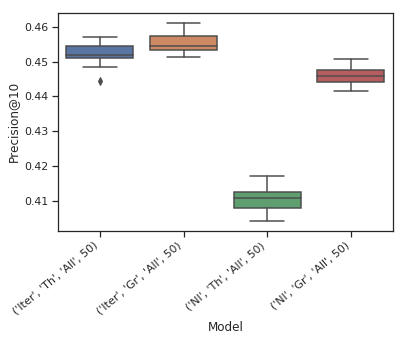

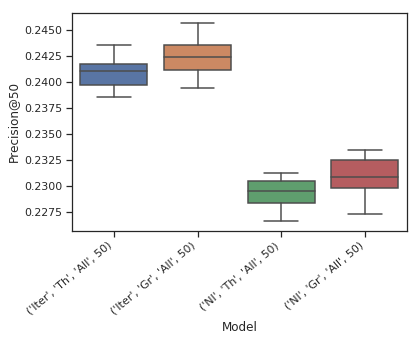

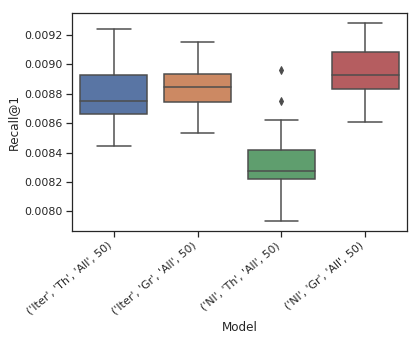

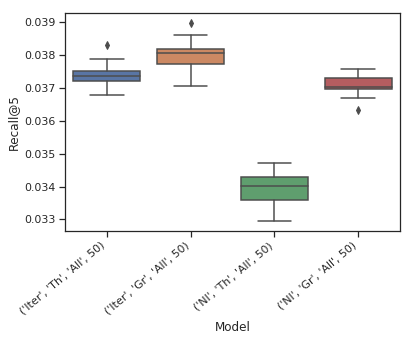

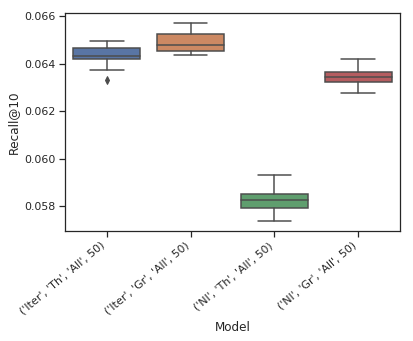

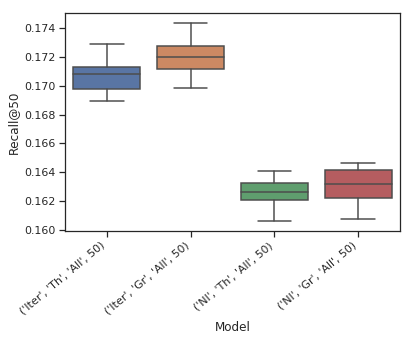

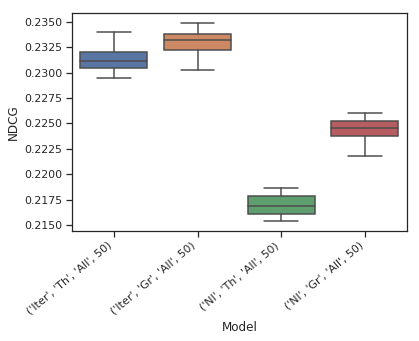

In [43]:
result_df_All_50 = result_df[(result_df['Select'] == 'All') & (result_df['Active Learning Iteration'] == 50)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

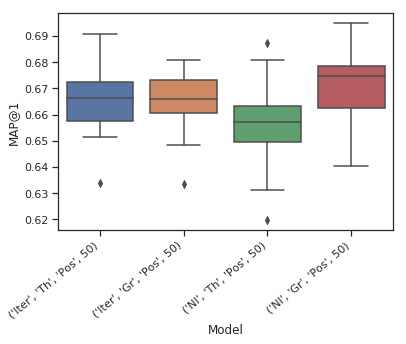

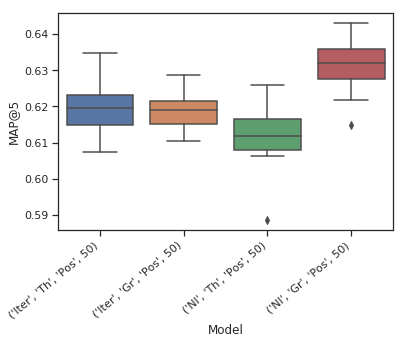

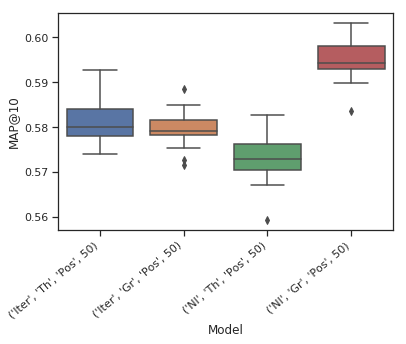

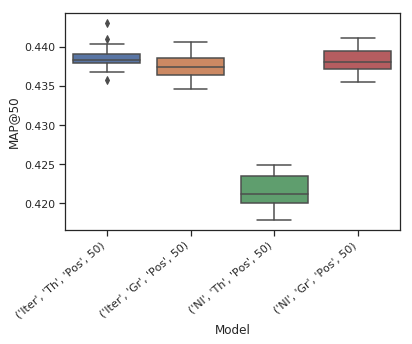

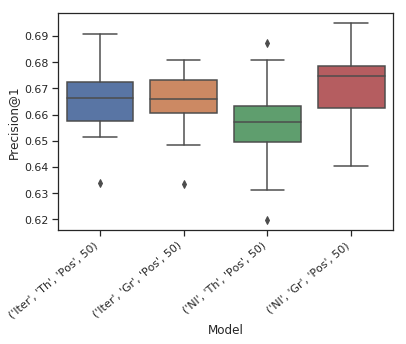

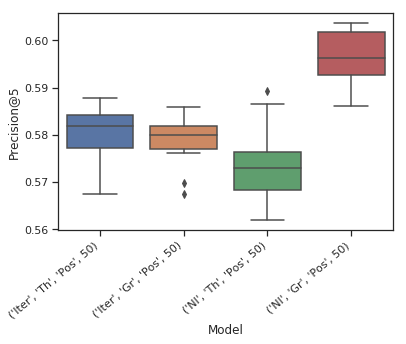

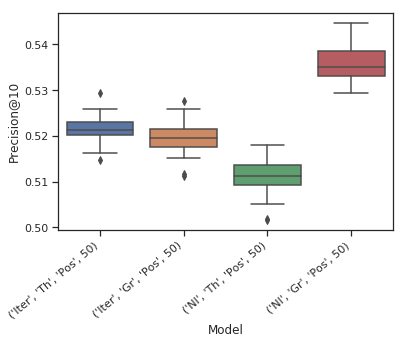

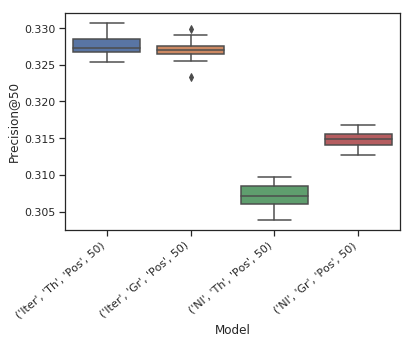

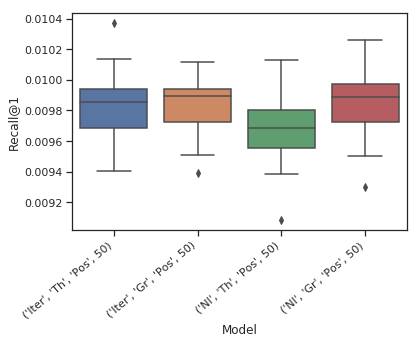

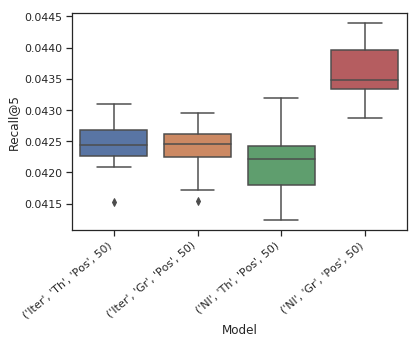

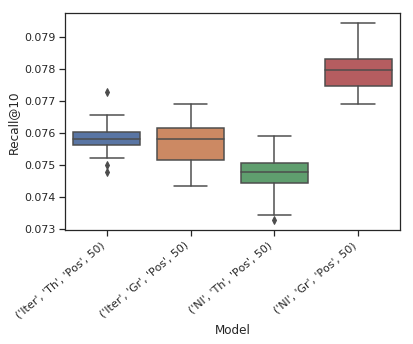

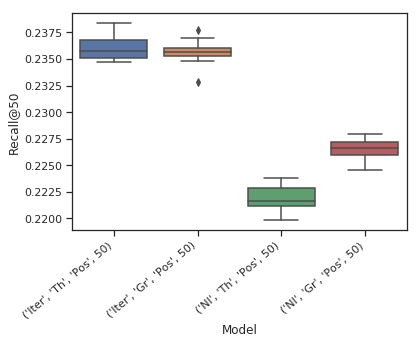

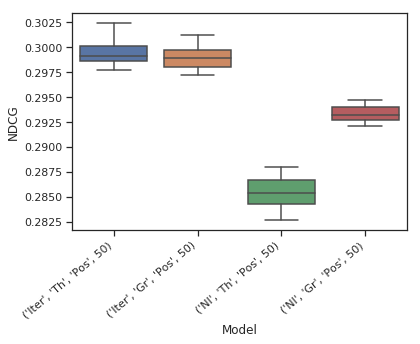

In [44]:
result_df_Pos_50 = result_df[(result_df['Select'] == 'Pos') & (result_df['Active Learning Iteration'] == 50)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

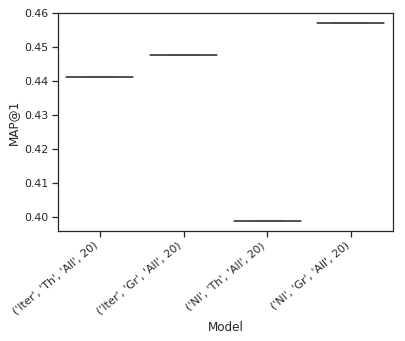

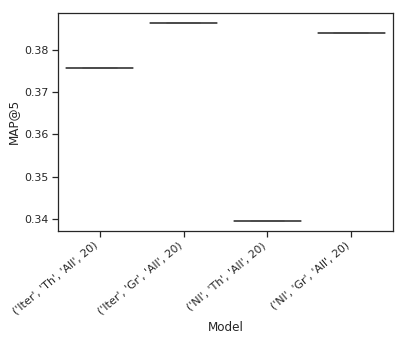

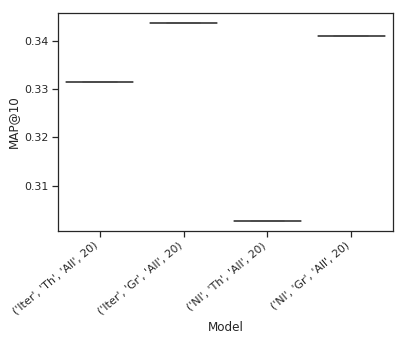

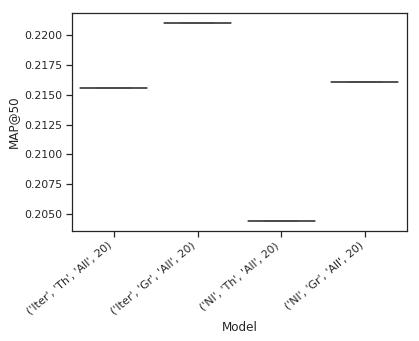

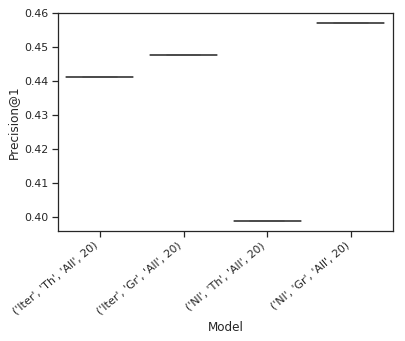

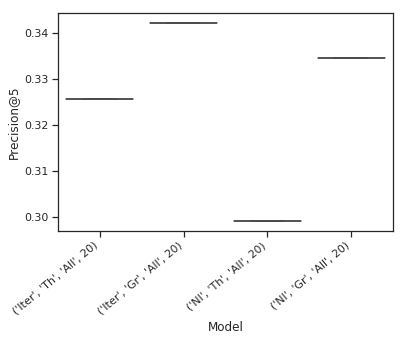

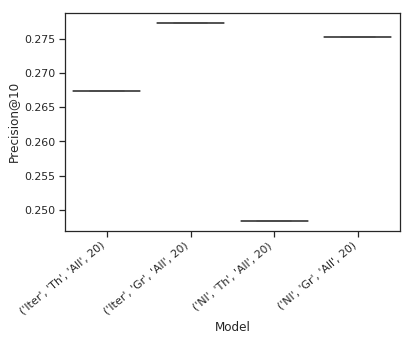

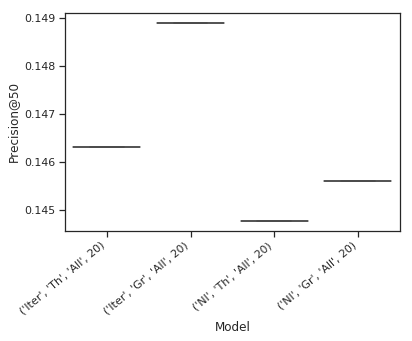

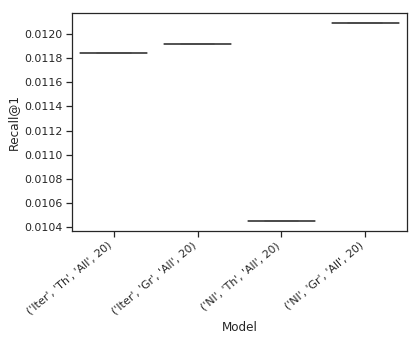

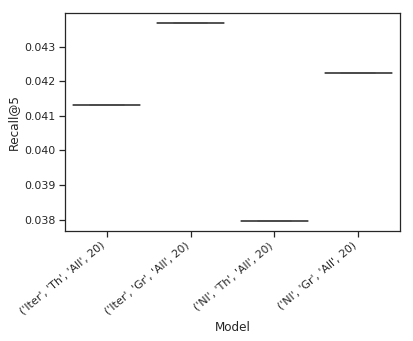

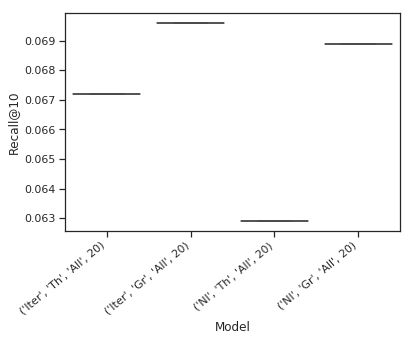

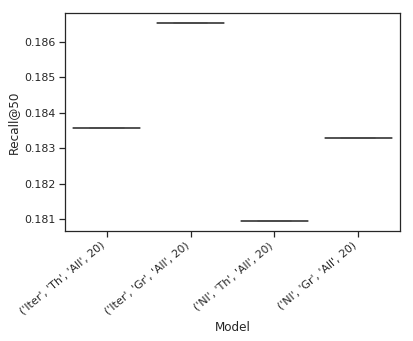

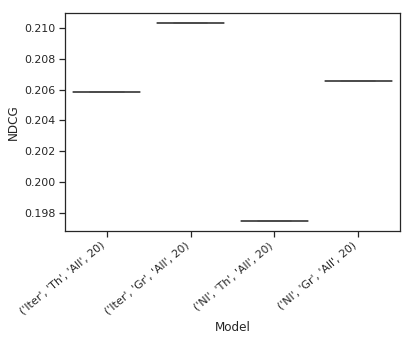

In [21]:
result_df_All_20 = result_df[(result_df['Select'] == 'All') & (result_df['Active Learning Iteration'] == 20)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

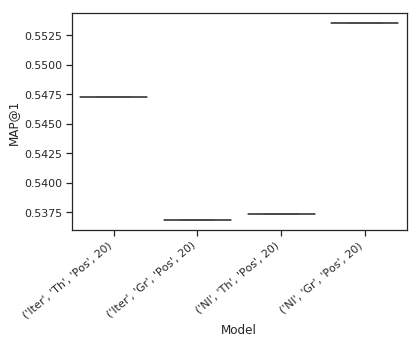

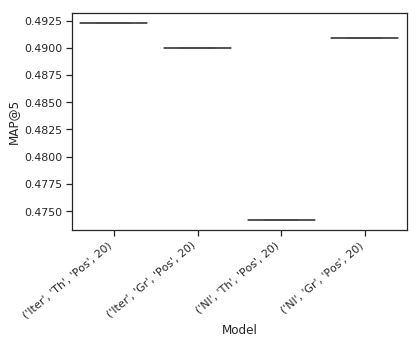

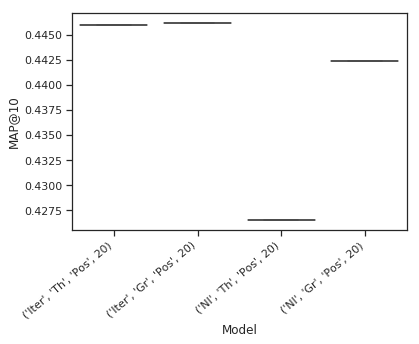

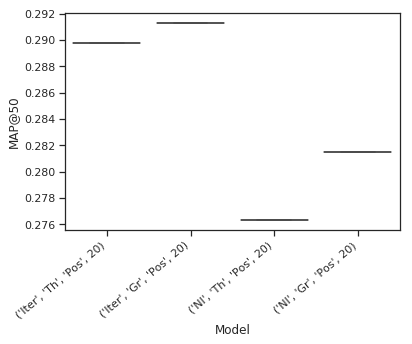

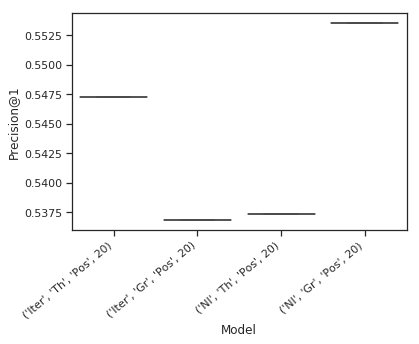

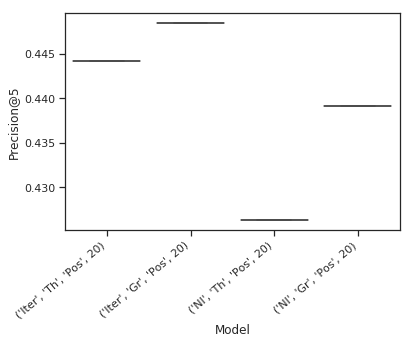

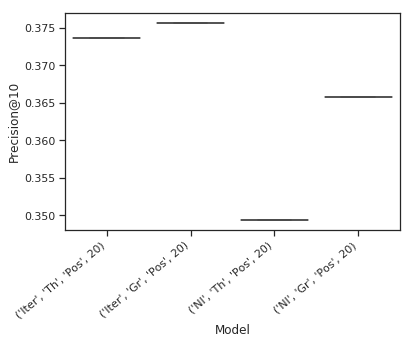

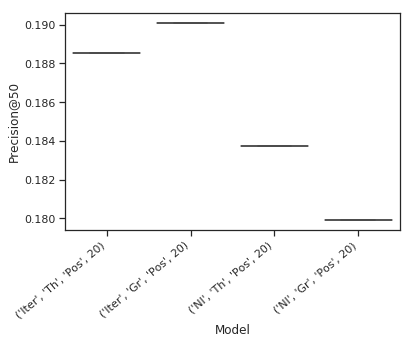

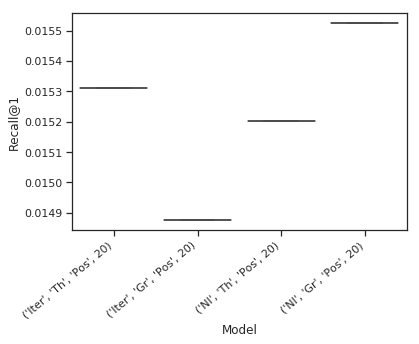

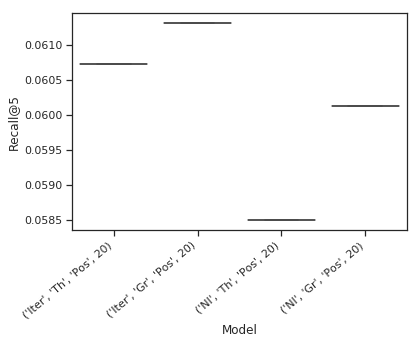

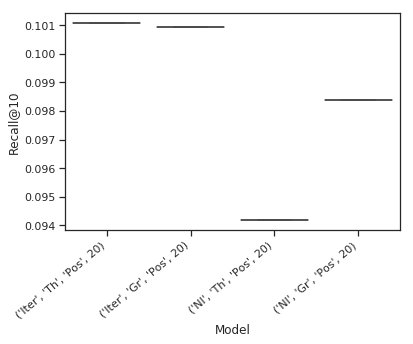

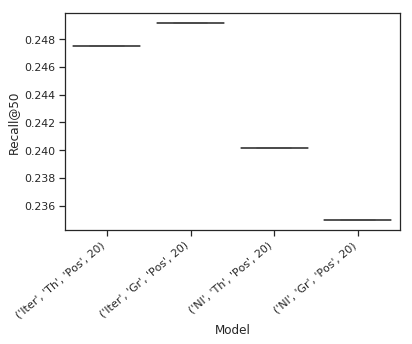

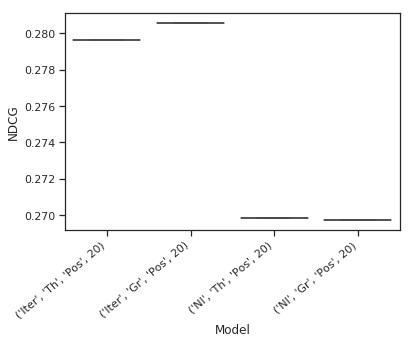

In [22]:
result_df_Pos_20 = result_df[(result_df['Select'] == 'Pos') & (result_df['Active Learning Iteration'] == 20)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

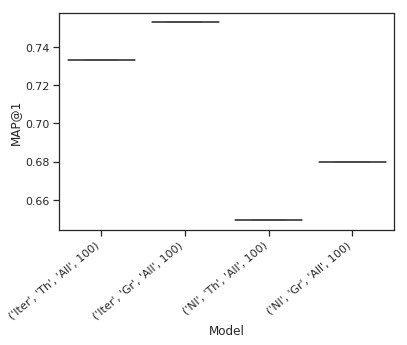

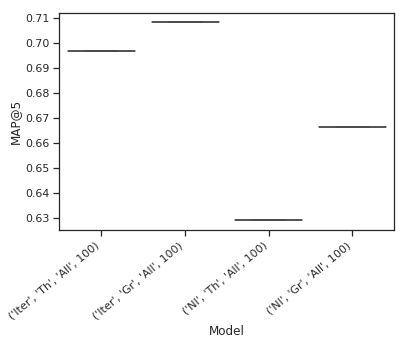

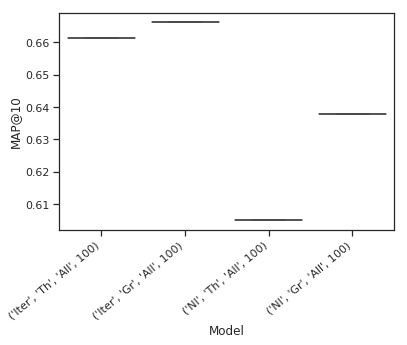

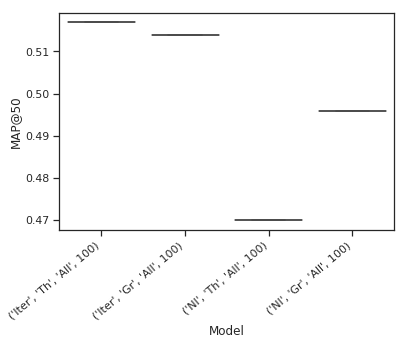

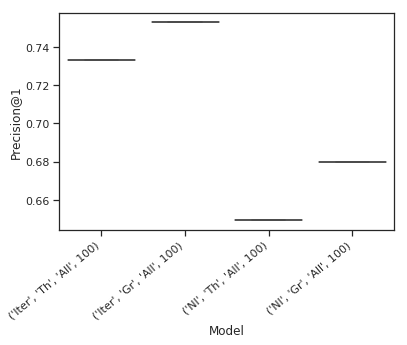

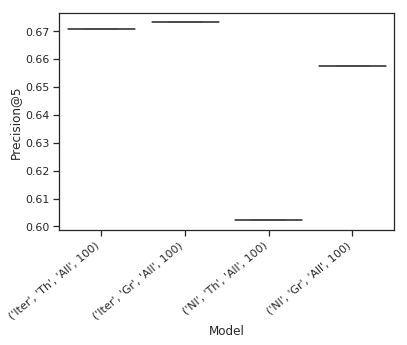

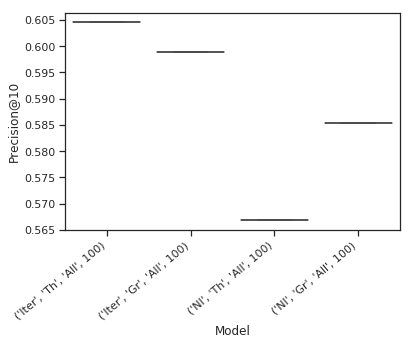

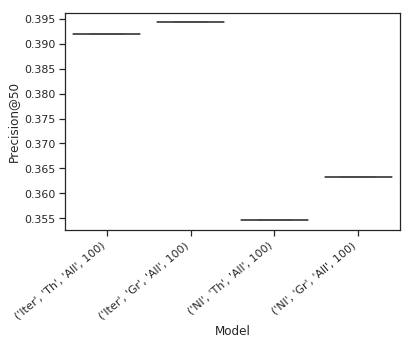

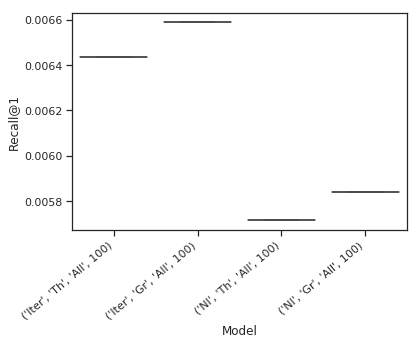

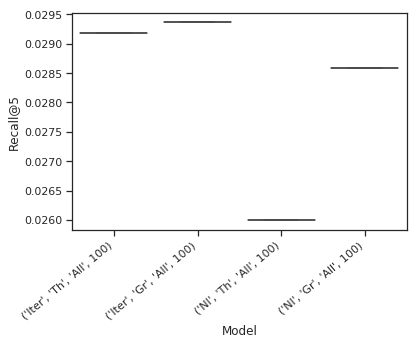

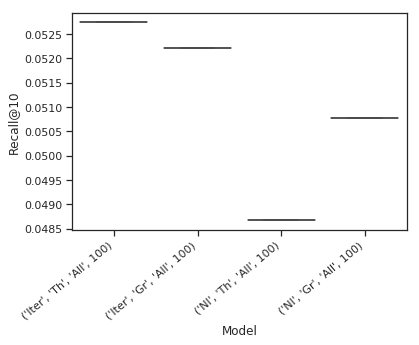

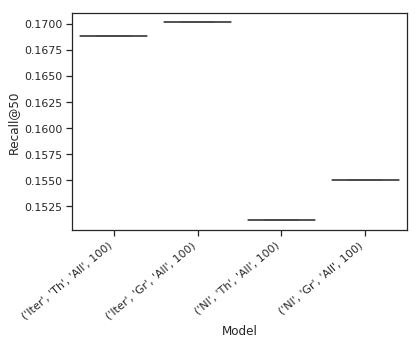

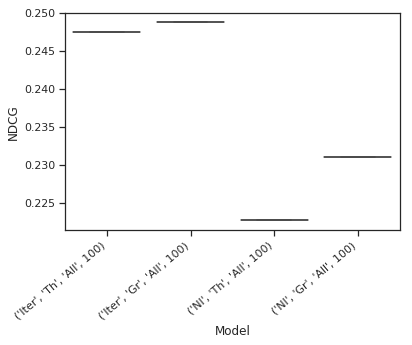

In [23]:
result_df_All_100 = result_df[(result_df['Select'] == 'All') & (result_df['Active Learning Iteration'] == 100)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

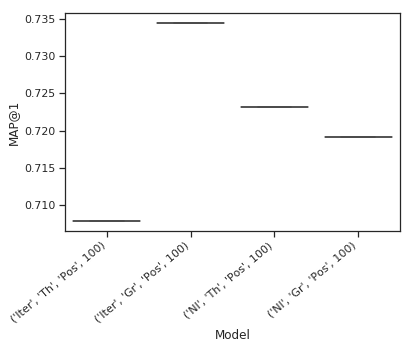

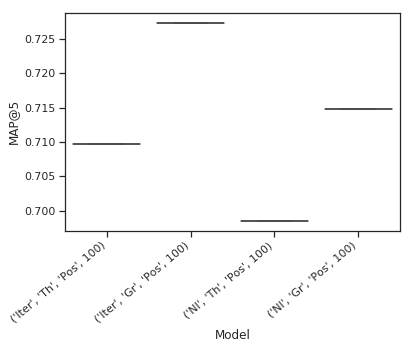

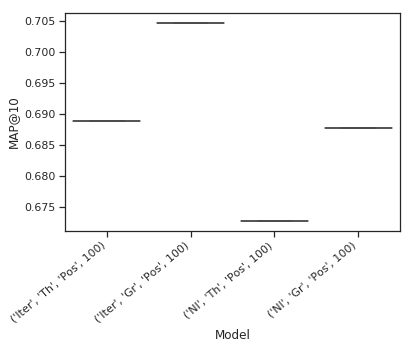

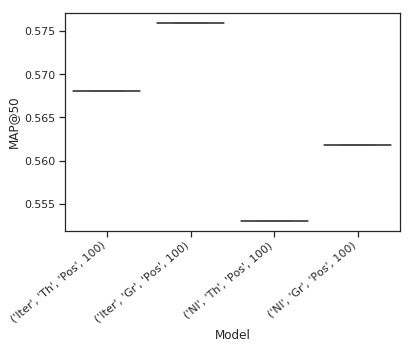

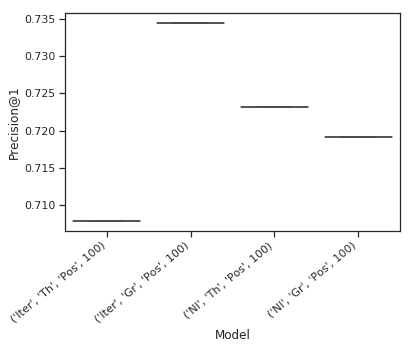

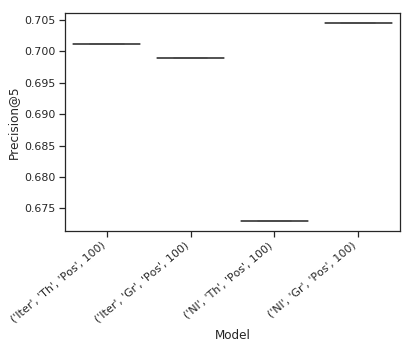

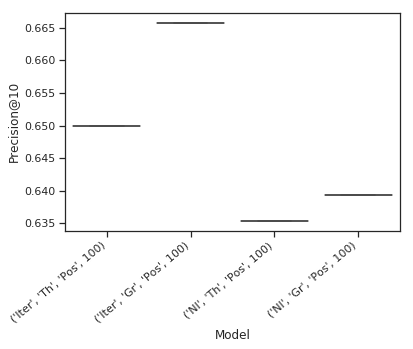

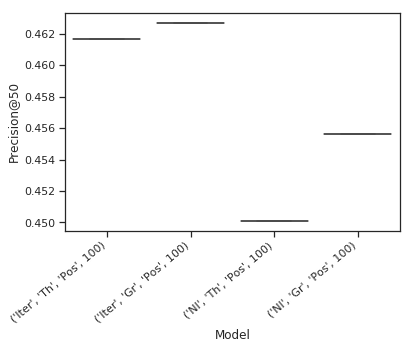

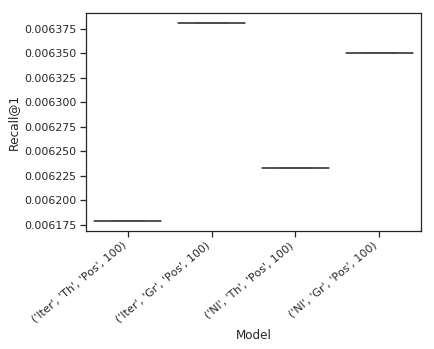

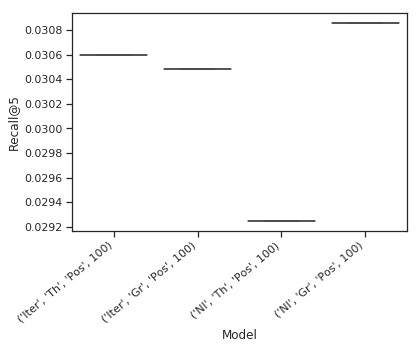

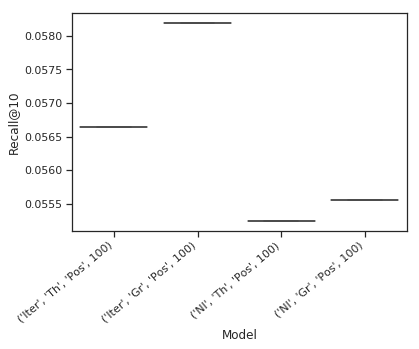

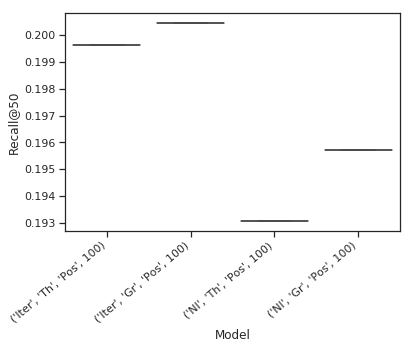

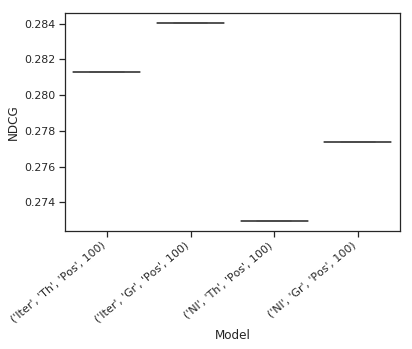

In [24]:
result_df_Pos_100 = result_df[(result_df['Select'] == 'Pos') & (result_df['Active Learning Iteration'] == 100)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")